<a href="https://colab.research.google.com/github/bhushan1729/First-Project/blob/main/ANN_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [445]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [446]:
# Creating a Model class that inherits nn.module
class Model(nn.Module):
  # Input Layer : 4 features of the flower
  # Hidden Layer1 :
  # Hidden Layer2 :
  # Output Layer : 3 (classes of iris flowers)
  def __init__(self, in_features=4, h1=10, h2=15, h3=5, out_features=3):
    super().__init__() # Inherit nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3,out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)

    return x

In [447]:
# Pick a manual seed for randmization
torch.manual_seed(42)

# Create an instance of model
model = Model()

In [448]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [449]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Convert to DataFrame
my_df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df['target'] = iris.target

# Display first few rows
my_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [450]:
my_df['target'] = iris.target

In [451]:
my_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [452]:
my_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [453]:
# Train Test Split
x = my_df.drop('target', axis=1)
y = my_df['target']

In [454]:
# Convert x and y to numpy array
x = x.values
y = y.values

In [455]:
#print(x)
#print(y)

In [456]:
from sklearn.model_selection import train_test_split


In [457]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 )

In [458]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

120
30
120
30


In [459]:
# Convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [460]:
print(x_train)
print(x_test)

tensor([[4.6000, 3.6000, 1.0000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.5000, 1.4000, 0

In [461]:
# Convert y leables to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [462]:
print(y_train)
print(y_test)

tensor([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0,
        2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1,
        0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0,
        0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])
tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])


In [463]:
# Set the criterion of model to measur the error, how far off the predictions are from true label
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [464]:
# Train our model
# Epochs (one run through all the training data in our network)
epochs = 73
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(x_train) # Get prediction results

  # Measure the loss
  loss = criterion(y_pred, y_train) # Predicted value vs Actual value

  # Keep track of losses
  losses.append(loss.detach().numpy())

  # Print every 5 epoch
  if i % 5 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Backpropagation, take the error rate of forward propagation and feed it back
  # through the network to fine-tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1405805349349976
Epoch: 5 and loss: 1.0668898820877075
Epoch: 10 and loss: 0.9946490526199341
Epoch: 15 and loss: 0.9067485332489014
Epoch: 20 and loss: 0.7934358716011047
Epoch: 25 and loss: 0.7170740365982056
Epoch: 30 and loss: 0.675694465637207
Epoch: 35 and loss: 0.6414041519165039
Epoch: 40 and loss: 0.6077764630317688
Epoch: 45 and loss: 0.5623248219490051
Epoch: 50 and loss: 0.5092975497245789
Epoch: 55 and loss: 0.4527237117290497
Epoch: 60 and loss: 0.38821038603782654
Epoch: 65 and loss: 0.3216635584831238
Epoch: 70 and loss: 0.26576271653175354


Text(0.5, 0, 'Epochs')

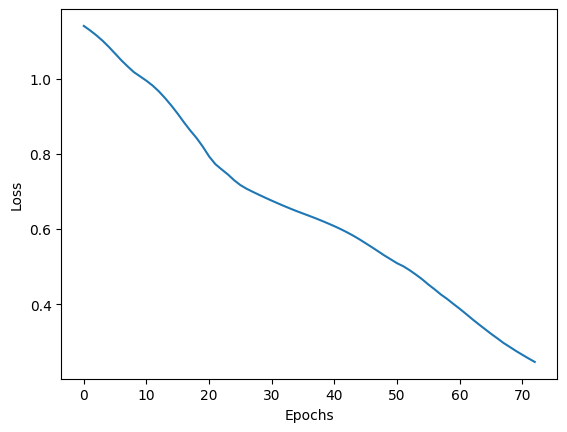

In [465]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [466]:
# Evalute the model on Test Data set (validate model on test set)
with torch.no_grad():
  y_eval = model.forward(x_test) # x_test are features from our test set
  loss = criterion(y_eval, y_test)
  print(f'Loss: {loss}')

Loss: 0.2593115270137787


In [467]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([-8.0300,  2.1096,  0.6735]) 	 1 	1
2.) tensor([ 0.9338, -0.2624, -0.8683]) 	 0 	0
3.) tensor([-20.8723,   1.6884,   8.8191]) 	 2 	2
4.) tensor([-7.7609,  2.1227,  0.4961]) 	 1 	1
5.) tensor([-8.4537,  2.3332,  0.5719]) 	 1 	1
6.) tensor([ 0.9338, -0.2624, -0.8683]) 	 0 	0
7.) tensor([-4.0255,  1.5468, -0.7479]) 	 1 	1
8.) tensor([-11.7594,   2.1829,   2.7347]) 	 2 	2
9.) tensor([-9.7185,  1.9584,  1.8944]) 	 1 	1
10.) tensor([-5.1176,  1.8730, -0.6384]) 	 1 	1
11.) tensor([-10.9123,   2.1051,   2.3618]) 	 2 	2
12.) tensor([ 0.9338, -0.2624, -0.8683]) 	 0 	0
13.) tensor([ 0.9338, -0.2624, -0.8683]) 	 0 	0
14.) tensor([ 0.9338, -0.2624, -0.8683]) 	 0 	0
15.) tensor([ 0.9338, -0.2624, -0.8683]) 	 0 	0
16.) tensor([-7.5420,  2.2958,  0.0985]) 	 1 	1
17.) tensor([-15.6703,   1.7105,   5.7524]) 	 2 	2
18.) tensor([-5.3699,  1.9366, -0.5995]) 	 1 	1
19.) tensor([-7.7439,  1.9966,  0.6829]) 	 1 	1
20.) tensor([-15.3845,   1.6761,   5.6395]) 	 2 	2
21.) tensor([ 0.9338, -0.2624, -0.

In [468]:
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=3, bias=True)
)


In [469]:
# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

Total parameters: 313


In [470]:
# Testing on new data point
new_iris = torch.tensor([5.6, 0.7, 2.2, 0.5])

with torch.no_grad():
  print(model(new_iris))

tensor([-2.1916,  0.9665, -0.8942])


In [471]:
data = torch.tensor([6.4,	3.2, 5.6,	2.0])
with torch.no_grad():
  print(model(data))

tensor([-13.5224,   1.8597,   4.2669])


In [472]:
# Save the NN model
torch.save(model.state_dict(), 'iris_model.pt')

In [473]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [474]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=3, bias=True)
)